Aufgabe 49.

Passen Sie für die Datensätze Stability, Helikopter und Zement jeweils nochmal ein lineares Modell an und führen Sie die Regressionsdiagnostik durch.

In [17]:
import pandas as pd
from utils import *
from statsmodels.api import OLS, add_constant, qqplot
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

# Stability

In [3]:
df = pd.read_csv('../data/stability.txt')
df.head()

,acid concentration,catalyst concentration,temperature,monomer concentration,Seed,stability
0,30,2,150,37.5,Yes,21.25
1,20,2,200,37.5,No,25.11
2,20,3,150,25.0,Yes,14.54
3,20,3,200,25.0,No,17.68
4,20,2,150,50.0,Yes,20.23


In [4]:
df['is_seed'] = (df['Seed'] == 'Yes').astype(int)
df = df.drop(columns=['Seed'])

In [5]:
df['acid_catalyst'] = df['acid concentration'] * df['catalyst concentration']
df['acid_temperature'] = df['acid concentration'] * df['temperature']
df['acid_monomer'] = df['acid concentration'] * df['monomer concentration']
df['catalyst_temperature'] = df['catalyst concentration'] * df['temperature']
df['catalyst_monomer'] = df['catalyst concentration'] * df['monomer concentration']
df['temperature_monomer'] = df['temperature'] * df['monomer concentration']
df['acid_seed'] = df['acid concentration'] * df['is_seed']
df['catalyst_seed'] = df['catalyst concentration'] * df['is_seed']
df['temperature_seed'] = df['temperature'] * df['is_seed']
df['monomer_seed'] = df['monomer concentration'] * df['is_seed']
df.head()

,acid concentration,catalyst concentration,temperature,monomer concentration,stability,is_seed,acid_catalyst,acid_temperature,acid_monomer,catalyst_temperature,catalyst_monomer,temperature_monomer,acid_seed,catalyst_seed,temperature_seed,monomer_seed
0,30,2,150,37.5,21.25,1,60,4500,1125.0,300,75.0,5625.0,30,2,150,37.5
1,20,2,200,37.5,25.11,0,40,4000,750.0,400,75.0,7500.0,0,0,0,0.0
2,20,3,150,25.0,14.54,1,60,3000,500.0,450,75.0,3750.0,20,3,150,25.0
3,20,3,200,25.0,17.68,0,60,4000,500.0,600,75.0,5000.0,0,0,0,0.0
4,20,2,150,50.0,20.23,1,40,3000,1000.0,300,100.0,7500.0,20,2,150,50.0


> In Aufgabe 45, haben wir das folgende Model gewählt:

In [6]:
X = df[['acid concentration', 
        'catalyst concentration', 
        'temperature', 
        'monomer concentration', 
        'is_seed', 
        'acid_catalyst', 
        'acid_monomer', 
        'catalyst_monomer', 
        'temperature_monomer', 
        'temperature_seed']]
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     177.2
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           3.24e-23
Time:                        23:43:35   Log-Likelihood:                -70.963
No. Observations:                  40   AIC:                             163.9
Df Residuals:                      29   BIC:                             182.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -19

In [7]:
X = df[['acid concentration', 
        'catalyst concentration', 
        'temperature', 
        'monomer concentration', 
        'is_seed', 
        'acid_catalyst', 
        'acid_monomer', 
        'temperature_monomer', 
        'temperature_seed']]
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     188.8
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           6.70e-24
Time:                        23:43:47   Log-Likelihood:                -72.461
No. Observations:                  40   AIC:                             164.9
Df Residuals:                      30   BIC:                             181.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -22

In [8]:
X = df[['acid concentration', 
        'catalyst concentration', 
        'temperature', 
        'monomer concentration', 
        'is_seed', 
        'acid_monomer', 
        'temperature_monomer', 
        'temperature_seed']]
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     202.4
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           1.48e-24
Time:                        23:44:40   Log-Likelihood:                -74.044
No. Observations:                  40   AIC:                             166.1
Df Residuals:                      31   BIC:                             181.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -25

In [9]:
X = df[['acid concentration', 
        'temperature', 
        'monomer concentration', 
        'is_seed', 
        'acid_monomer', 
        'temperature_monomer', 
        'temperature_seed']]
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     234.1
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           1.25e-25
Time:                        23:45:30   Log-Likelihood:                -74.433
No. Observations:                  40   AIC:                             164.9
Df Residuals:                      32   BIC:                             178.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -25.21

In [10]:
X = df[['acid concentration', 
        'temperature', 
        'monomer concentration', 
        'is_seed', 
        'acid_monomer', 
        'temperature_monomer']]
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     255.3
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           3.45e-26
Time:                        23:46:35   Log-Likelihood:                -76.360
No. Observations:                  40   AIC:                             166.7
Df Residuals:                      33   BIC:                             178.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -24.39

In [12]:
X = df[['acid concentration', 
        'temperature', 
        'monomer concentration',
        'acid_monomer', 
        'temperature_monomer']]
y = df['stability']
X = add_constant(X)
model = OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              stability   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     313.6
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           2.04e-27
Time:                        23:48:50   Log-Likelihood:                -76.487
No. Observations:                  40   AIC:                             165.0
Df Residuals:                      34   BIC:                             175.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -24.60

In [13]:
OLS(y, add_constant(df[['acid concentration', 
                        'catalyst concentration', 
                        'temperature', 
                        'monomer concentration', 
                        'is_seed', 
                        'acid_catalyst', 
                        'acid_monomer', 
                        'catalyst_monomer', 
                        'temperature_monomer', 
                        'temperature_seed']])).fit().compare_f_test(model)[1]

np.float64(0.1351368878175819)

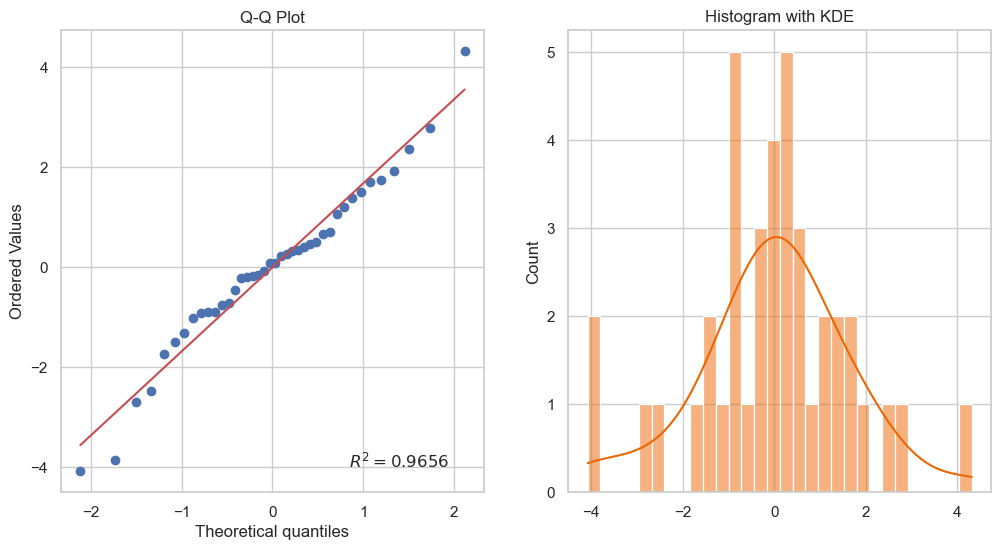

Shapiro-Wilk normality test: p-value = 0.4788
D'Agostino's K^2 normality test: p-value = 0.3148
Kolmogorov-Smirnov normality test: p-value = 0.7994
Anderson-Darling normality test: statistic = 0.4336, critical value = 0.7260


In [14]:
check_normality(model.resid);

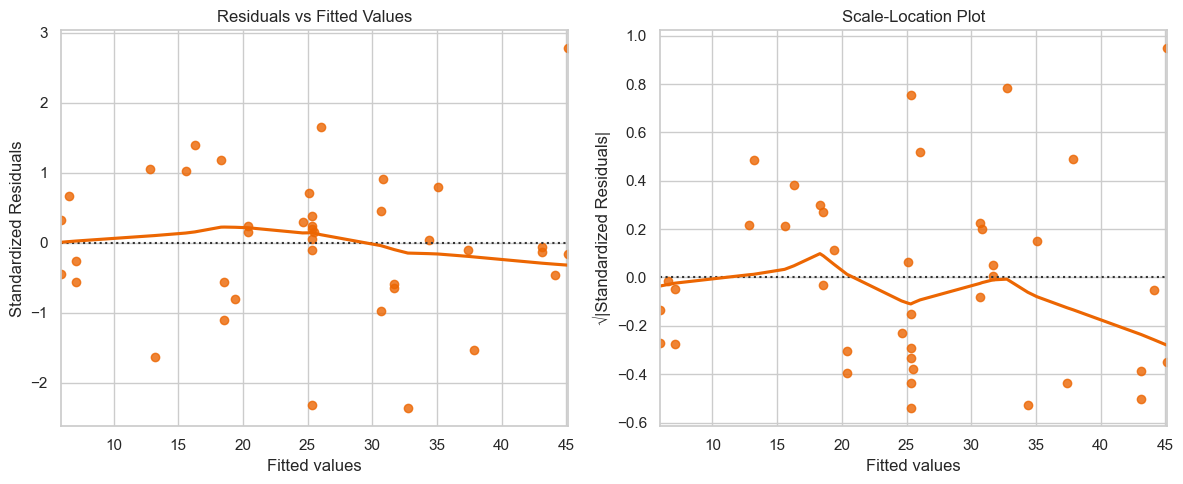

Breusch-Pagan test statistic: p-value = 0.1656
F-statistic: p-value = 0.1719
ARCH test statistic: p-value = 0.6187
F-statistic: p-value = 0.6895
White test statistic: p-value = 0.6947
F-statistic: p-value = 0.8009
Goldfeld-Quandt test statistic: p-value = 0.8431


In [15]:
check_homoscedasticity(model);

In [18]:
exog = model.model.exog
vif = pd.DataFrame({
    'VIF': [variance_inflation_factor(exog, i) for i in range(exog.shape[1])],
    'Variable': model.model.exog_names
})
vif

,VIF,Variable
0,366.538462,const
1,12.700000,acid concentration
2,12.700000,temperature
3,24.400000,monomer concentration
4,24.400000,acid_monomer
5,24.400000,temperature_monomer


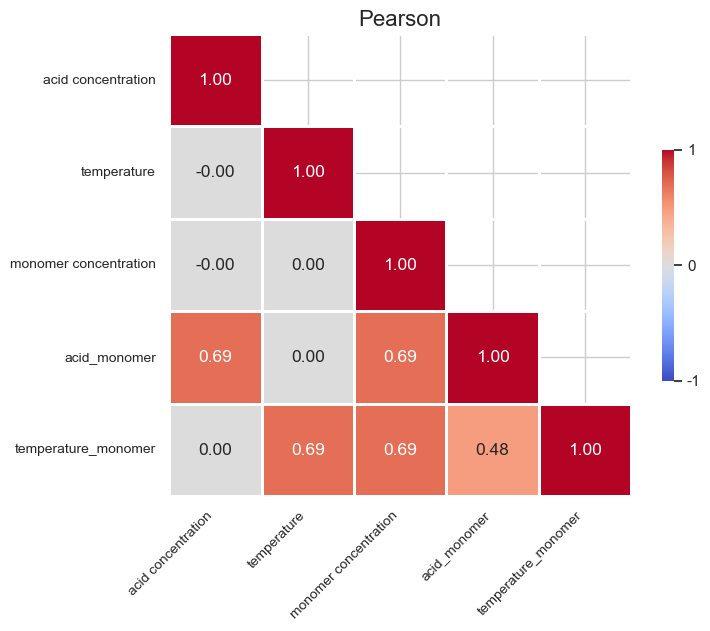

In [19]:
num_corr_heatmap(X.drop(columns='const').corr())

1.18e+05 -> Multikollinearität -> VIF > 10 -> besteht aus Interaktionstermen wie acid_x_monomer und temperature_x_monomer -> also sollte kein großes Problem sein

# Helicopter

In [265]:
df = pd.read_csv('../data/Helicopter.txt')
df.head()

,Weight,Wing width,Wing Length,Body Length,Flight Time
0,2,4,8,13,1.65
1,2,2,8,13,1.56
2,2,4,8,8,1.87
3,2,4,8,13,1.89
4,2,2,8,13,1.93


In [266]:
df = df.rename(columns={'Weight': 'weight', 
                        'Wing width': 'wing_width', 
                        'Wing Length': 'wing_length', 
                        'Body Length': 'body_length', 
                        'Flight Time': 'flight_time'})

In [267]:
df.drop(columns=['flight_time']).apply(lambda x: pd.Series(x.unique())).T

,0,1
weight,2,1
wing_width,4,2
wing_length,8,13
body_length,13,8


In [268]:
df.weight = df.weight.map({1: -1, 2: 1})
df.wing_width = df.wing_width.map({4: 1, 2: -1})
df.wing_length = df.wing_length.map({13: 1, 8: -1})
df.body_length = df.body_length.map({13: 1, 8: -1})

In [269]:
df.drop(columns=['flight_time']).apply(lambda x: pd.Series(x.unique())).T

,0,1
weight,1,-1
wing_width,1,-1
wing_length,-1,1
body_length,1,-1


In [270]:
X = df.drop(columns=['flight_time'])
y = df['flight_time']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            flight_time   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     87.47
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           4.75e-15
Time:                        01:34:07   Log-Likelihood:                 22.909
No. Observations:                  32   AIC:                            -35.82
Df Residuals:                      27   BIC:                            -28.49
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4028      0.023    105.573      

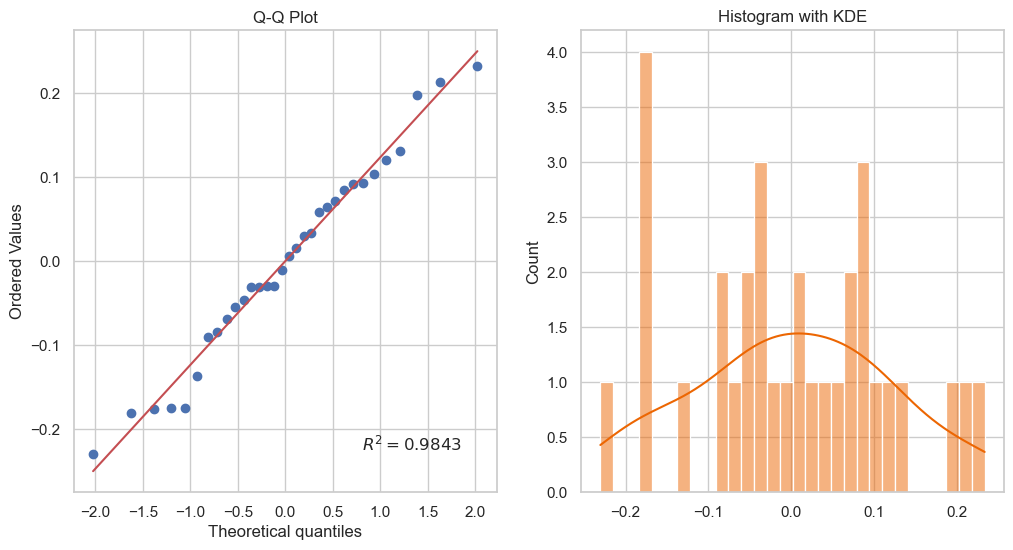

Shapiro-Wilk normality test: p-value = 0.6920
D'Agostino's K^2 normality test: p-value = 0.8038
Kolmogorov-Smirnov normality test: p-value = 0.9662
Anderson-Darling normality test: statistic = 0.2225, critical value = 0.7150


In [271]:
check_normality(model.resid)

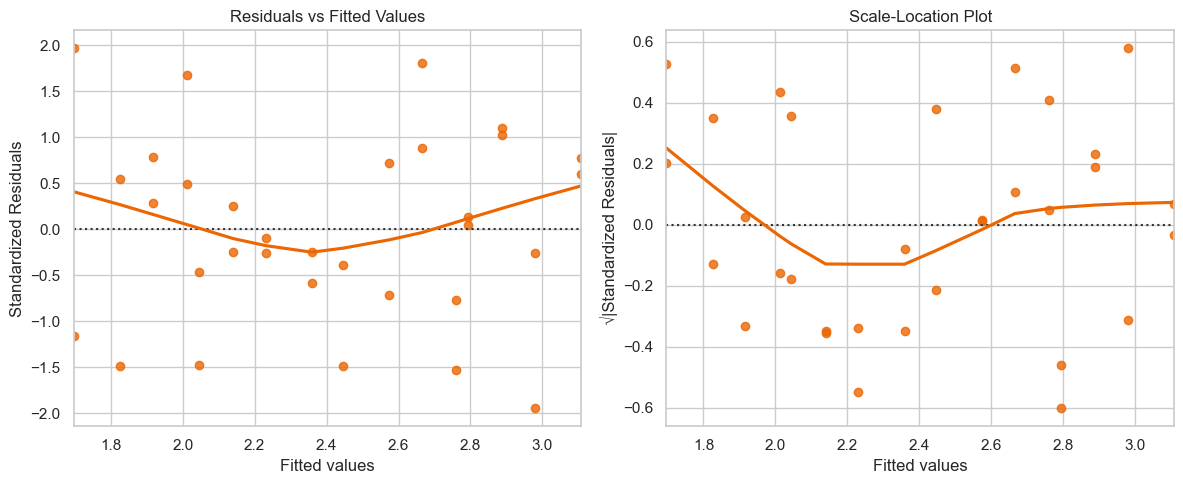

Breusch-Pagan test statistic: p-value = 0.2387
F-statistic: p-value = 0.2592
ARCH test statistic: p-value = 0.3763
F-statistic: p-value = 0.4300
White test statistic: p-value = 0.4525
F-statistic: p-value = 0.5219
Goldfeld-Quandt test statistic: p-value = 0.3734


In [272]:
check_homoscedasticity(model);

# Zement

In [273]:
df = pd.read_csv('../data/zement.txt')
df.head()

,Festigkeit,Marke,Additiv,Feuchtigkeit
0,32.6,Grauert,Verstärker,56.4
1,31.5,Grauert,Verstärker,44.1
2,30.0,Grauert,Verstärker,50.0
3,29.8,Grauert,Standard,52.5
4,29.7,Grauert,Verstärker,46.7


In [274]:
df.Marke.value_counts(), df.Additiv.value_counts()

(Marke
 Grauert    10
 Konsort    10
 Zemix      10
 Name: count, dtype: int64,
 Additiv
 Verstärker    15
 Standard      15
 Name: count, dtype: int64)

In [275]:
df = pd.get_dummies(df, columns=['Marke', 'Additiv'], dtype=int).drop(columns=['Marke_Zemix', 'Additiv_Verstärker'])
df.head()

,Festigkeit,Feuchtigkeit,Marke_Grauert,Marke_Konsort,Additiv_Standard
0,32.6,56.4,1,0,0
1,31.5,44.1,1,0,0
2,30.0,50.0,1,0,0
3,29.8,52.5,1,0,1
4,29.7,46.7,1,0,0


In [276]:
# Polynomiale Features
df['Feuchtigkeit_squared'] = df['Feuchtigkeit'] ** 2

# Wechselwirkungen
df['Konsort_x_Feuchtigkeit'] = df['Marke_Konsort'] * df['Feuchtigkeit']
df['Grauert_x_Feuchtigkeit'] = df['Marke_Grauert'] * df['Feuchtigkeit']
df['Standard_x_Feuchtigkeit'] = df['Additiv_Standard'] * df['Feuchtigkeit']
df['Konsort_x_Standard'] = df['Marke_Konsort'] * df['Additiv_Standard']
df['Grauert_x_Standard'] = df['Marke_Grauert'] * df['Additiv_Standard']
df.head()

,Festigkeit,Feuchtigkeit,Marke_Grauert,Marke_Konsort,Additiv_Standard,Feuchtigkeit_squared,Konsort_x_Feuchtigkeit,Grauert_x_Feuchtigkeit,Standard_x_Feuchtigkeit,Konsort_x_Standard,Grauert_x_Standard
0,32.6,56.4,1,0,0,3180.96,0.0,56.4,0.0,0,0
1,31.5,44.1,1,0,0,1944.81,0.0,44.1,0.0,0,0
2,30.0,50.0,1,0,0,2500.00,0.0,50.0,0.0,0,0
3,29.8,52.5,1,0,1,2756.25,0.0,52.5,52.5,0,1
4,29.7,46.7,1,0,0,2180.89,0.0,46.7,0.0,0,0


In [293]:
X = df.drop(columns=['Festigkeit'])
y = df['Festigkeit']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Festigkeit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     8.687
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           3.43e-05
Time:                        01:47:05   Log-Likelihood:                -53.256
No. Observations:                  30   AIC:                             128.5
Df Residuals:                      19   BIC:                             143.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
X = df.drop(columns=['Festigkeit', 'Standard_x_Feuchtigkeit'])
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Festigkeit   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     10.14
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           1.04e-05
Time:                        01:48:13   Log-Likelihood:                -53.284
No. Observations:                  30   AIC:                             126.6
Df Residuals:                      20   BIC:                             140.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     18

In [295]:
model.compare_f_test(OLS(y, add_constant(df.drop(columns=['Festigkeit', 'Standard_x_Feuchtigkeit', 'Konsort_x_Standard', 'Grauert_x_Standard']))).fit())

(np.float64(2.7472789094703853),
 np.float64(0.08827243719193542),
 np.float64(2.0))

In [296]:
X = df.drop(columns=['Festigkeit', 'Standard_x_Feuchtigkeit', 'Konsort_x_Standard', 'Grauert_x_Standard'])
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Festigkeit   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     10.57
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           8.86e-06
Time:                        01:51:51   Log-Likelihood:                -56.925
No. Observations:                  30   AIC:                             129.8
Df Residuals:                      22   BIC:                             141.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     25

In [300]:
model.compare_f_test(OLS(y, add_constant(df[['Feuchtigkeit', 'Marke_Grauert', 'Marke_Konsort', 'Additiv_Standard']])).fit())

(np.float64(0.437568891574006),
 np.float64(0.7283410303575578),
 np.float64(3.0))

In [301]:
X = df[['Feuchtigkeit', 'Marke_Grauert', 'Marke_Konsort', 'Additiv_Standard']]
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Festigkeit   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     19.48
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           2.17e-07
Time:                        01:55:15   Log-Likelihood:                -57.794
No. Observations:                  30   AIC:                             125.6
Df Residuals:                      25   BIC:                             132.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               41.6897      2.960  

In [302]:
model.compare_f_test(OLS(y, add_constant(df[['Feuchtigkeit', 'Additiv_Standard']])).fit())

(np.float64(14.552968639320389),
 np.float64(6.43707470334707e-05),
 np.float64(2.0))

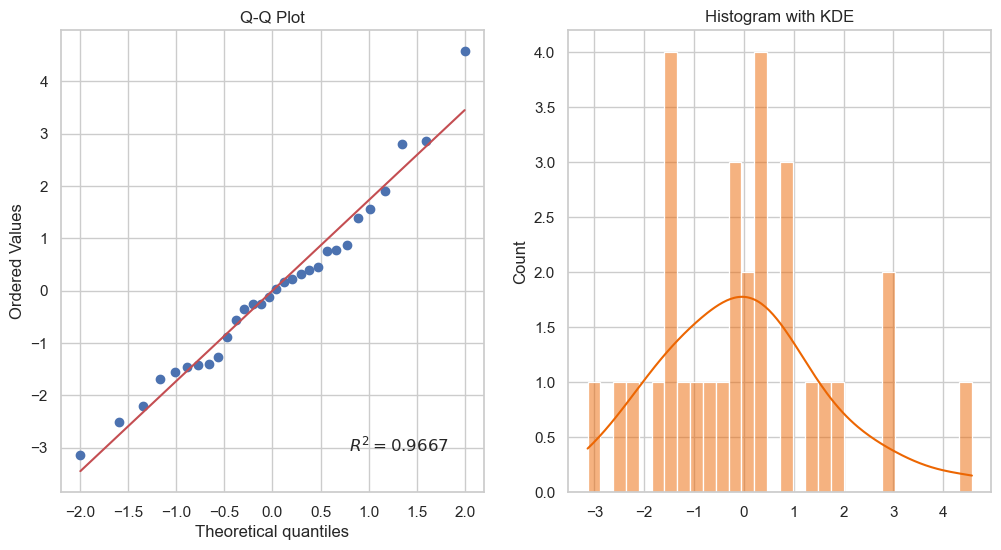

Shapiro-Wilk normality test: p-value = 0.5966
D'Agostino's K^2 normality test: p-value = 0.2128
Kolmogorov-Smirnov normality test: p-value = 0.8852
Anderson-Darling normality test: statistic = 0.2930, critical value = 0.7120


In [303]:
check_normality(model.resid)

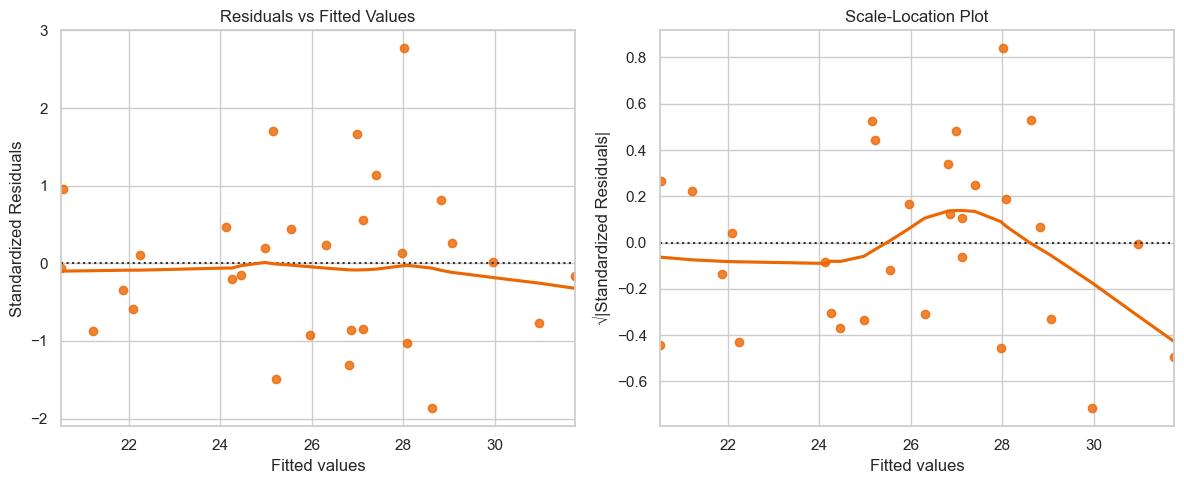

Breusch-Pagan test statistic: p-value = 0.6504
F-statistic: p-value = 0.6936
ARCH test statistic: p-value = 0.5806
F-statistic: p-value = 0.6585
White test statistic: p-value = 0.7060
F-statistic: p-value = 0.7945
Goldfeld-Quandt test statistic: p-value = 0.9644


In [304]:
check_homoscedasticity(model);

### Fragen:

1. Macht es einen Unterschied, wenn ich nur ein einzelnes Effek mit F-Test teste und oder alle zusammen und dann p-Wert ansehe?

2. Was wenn eine Kategorie (eine Dummy-Variable von einer Kategorialen Variable) signifikant ist, aber die anderen nicht bzw. die Kategoriale Variable ingesamt nicht signifikant ist?

3. Wenn eine Kategoriale Variable ingesamt nicht signifikant ist (bzw. alle dummy-Variablen "ingesamt" nicht signifikant sind) getestet durch F-Test, soll ich trotzdem ihre Interaktionseffekte testen oder von Anfang an komplett weglassen?

4. Soll ich eine Variable entfernen, wenn das zu einem geringeren R2 und R2-Adjusted bzws. höheren AIC und BIC führe (Oft der Unterschied ist sehr klein). Falls ja, was wenn ich das mehrmals mache und am Ende einen deutlich schlechteren R2 bekomme und F-Test vergleich zwischen diesem einfachen Modell und vorherigem komplexen Modell signifikant wäre. Also mit anderen Wörtern hatten die einzelnen Varibalen jeweils unsichtbaren Effekt aber ingesamt haben sie deutlich größeren Effekt, was sollte man in so einem Fall tun?